In [1]:
import json
import requests
import pandas as pd
import folium 


In [352]:
giro="ropa"
long=19.421336 
lat=-99.162700
mts=1000

In [353]:
response = requests.get("https://www.inegi.org.mx/app/api/denue/v1/consulta/Buscar/{}/{},{}/{}/44522d01-cae7-455b-9b53-7fc7d481cecb".format(giro,long,lat,mts))
results = response.json()

data = pd.DataFrame(response.json())
print(len(data))
data.head()


127


,CP,Calle,CentroComercial,Clase_actividad,Colonia,Correo_e,Estrato,Id,Latitud,Longitud,...,NumLocal,Num_Exterior,Num_Interior,Razon_social,Sitio_internet,Telefono,Tipo,TipoCentroComercial,Tipo_vialidad,Ubicacion
0,06700,CHAPULTEPEC,,"Comercio al por menor de ropa, excepto de bebé...",ROMA NORTE,,0 a 5 personas,1028566,19.42291204,-99.16300694,...,,,,,WWW.ERICK-MARBOUTIQUE.COM.MX,,Fijo,,AVENIDA,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
1,06700,OAXACA,,Confección de prendas de vestir sobre medida,ROMA NORTE,,0 a 5 personas,7732571,19.42267289,-99.16370774,...,,12,,SHAILLA VALDERRAMA LOYOLA,,,Fijo,,AVENIDA,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
2,06700,JALAPA,,Comercio al por menor de artículos usados,ROMA NORTE,,0 a 5 personas,8386350,19.42303170,-99.16240274,...,,13,,VENTA DE ROPA USADA,,,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
3,06700,INSURGENTES SUR,NO ME LO PROPORCIONARON,Fabricación de ropa exterior de tejido de punto,ROMA NORTE,ISPANACAPITAL@HOTMAIL.COM,0 a 5 personas,657665,19.41977970,-99.16400320,...,216,216,0,,,,Fijo,EDIFICIO COMERCIAL Y DE SERVICIOS,AVENIDA,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
4,06700,JALAPA,,"Comercio al por menor de ropa, excepto de bebé...",ROMA NORTE,LEMURSHOP@GMAIL.COM,0 a 5 personas,1029621,19.41941920,-99.16151743,...,,85,0,,,,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"


In [354]:
www=data.Estrato.value_counts()
sss=data.Clase_actividad.value_counts()
sss

Comercio al por menor de ropa, excepto de bebé y lencería                                 102
Confección en serie de otra ropa exterior de materiales textiles                            9
Comercio al por mayor de ropa, bisutería y accesorios de vestir                             4
Comercio al por menor de artículos usados                                                   3
Confección de prendas de vestir sobre medida                                                2
Fabricación de ropa exterior de tejido de punto                                             2
Comercio al por menor de ropa de cuero y piel y de otros artículos de estos materiales      2
Comercio al por menor de artículos y aparatos deportivos                                    1
Comercio al por menor de ropa de bebé                                                       1
Alquiler de prendas de vestir                                                               1
Name: Clase_actividad, dtype: int64

In [355]:
info = pd.read_csv('../info.csv')
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466301 entries, 0 to 466300
Data columns (total 16 columns):
Unnamed: 0    466301 non-null int64
id            466301 non-null int64
nom_estab     466301 non-null object
codigo_act    466301 non-null int64
nombre_act    466301 non-null object
tipoCenCom    88178 non-null object
per_ocu       466301 non-null object
tipoUniEco    466301 non-null object
ageb          466285 non-null object
manzana       466285 non-null float64
latitud       466301 non-null float64
longitud      466301 non-null float64
fecha_alta    466301 non-null object
www           37279 non-null object
Año           466301 non-null int64
Mes           466301 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 56.9+ MB


In [356]:


#for e in info.select_dtypes('object').columns:
 #   info[e]=info[e].astype('category')
for e in info.select_dtypes('integer').columns:
    info[e]=pd.to_numeric(info[e], downcast='integer')
for e in info.select_dtypes('float').columns:
    info[e]=pd.to_numeric(info[e], downcast='float')  
    
info["fecha_alta"]=pd.to_datetime(info.fecha_alta)




In [357]:
empresas=data.Id
len(empresas)
d=info[info["id"].isin(empresas)]
d.reset_index(drop=True,inplace=True)
d.info()
d["manzana"]=d.manzana.astype(int)
d["clave"]=d["ageb"].astype(str) + "-" + d["manzana"].astype(str)
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 16 columns):
Unnamed: 0    127 non-null int32
id            127 non-null int32
nom_estab     127 non-null object
codigo_act    127 non-null int32
nombre_act    127 non-null object
tipoCenCom    27 non-null object
per_ocu       127 non-null object
tipoUniEco    127 non-null object
ageb          127 non-null object
manzana       127 non-null float32
latitud       127 non-null float32
longitud      127 non-null float32
fecha_alta    127 non-null datetime64[ns]
www           60 non-null object
Año           127 non-null int16
Mes           127 non-null int8
dtypes: datetime64[ns](1), float32(3), int16(1), int32(3), int8(1), object(7)
memory usage: 11.4+ KB


,Unnamed: 0,id,nom_estab,codigo_act,nombre_act,tipoCenCom,per_ocu,tipoUniEco,ageb,manzana,latitud,longitud,fecha_alta,www,Año,Mes,clave
0,3630,7732571,BOUTIQUE DE ROPA SOREIM FASHION ATELIER,315225,Confección de prendas de vestir sobre medida,NaN,0 a 5 personas,Fijo,0998,19,19.422672,-99.163712,2019-11-01,NaN,2019,11,0998-19
1,4398,863029,DOCE CERO TRES,315229,Confección en serie de otra ropa exterior de m...,NaN,0 a 5 personas,Fijo,1106,10,19.417927,-99.160439,2010-07-01,WWW.DOCECEROTRES.COM.MX,2010,7,1106-10
2,4762,8326112,ELABORACIÓN DE VESTIMENTA HECHO MXCITY,315229,Confección en serie de otra ropa exterior de m...,NaN,0 a 5 personas,Fijo,0998,9,19.421940,-99.168671,2019-11-01,WWW.HECHO.COM.MX,2019,11,0998-9
3,5157,1028977,FIDENZE COLLEZIONE,315229,Confección en serie de otra ropa exterior de m...,OTRO CONGLOMERADO,0 a 5 personas,Fijo,095A,6,19.423574,-99.165787,2010-07-01,NaN,2010,7,095A-6
4,5168,8326350,FLOR DE MAYO ESTRATEGIAS,315229,Confección en serie de otra ropa exterior de m...,EDIFICIO COMERCIAL Y DE SERVICIOS,31 a 50 personas,Fijo,1093,11,19.417782,-99.165863,2019-11-01,NaN,2019,11,1093-11


In [358]:
llat=list(d.latitud)
llong=list(d.longitud)
name=list(d.nom_estab)

mapa=folium.Map(location=[long, lat], tiles='openstreetmap', zoom_start=15,)

for i in range(len(d)):
    folium.Marker([llat[i], llong[i]], icon=folium.Icon(color='red'),popup=name[i]).add_to(mapa)

    
display(mapa)

mapa.save("../mapas/mapa {}.html".format(giro))

In [359]:
d.fecha_alta.value_counts()

2010-07-01    52
2019-11-01    42
2014-12-01    19
2011-03-01     4
2016-10-01     4
2017-03-01     2
2017-11-01     2
2012-06-01     1
2019-04-01     1
Name: fecha_alta, dtype: int64

In [360]:
'''
dat=pd.DataFrame(d.fecha_alta.value_counts())
dat=dat.sort_index()
dat.index = pd.DatetimeIndex(dat.index).to_period('M')
train=dat[1:-1]
modelo=AR(train).fit()
pred=modelo.predict(8,10)
print(pred)
train
'''

"\ndat=pd.DataFrame(d.fecha_alta.value_counts())\ndat=dat.sort_index()\ndat.index = pd.DatetimeIndex(dat.index).to_period('M')\ntrain=dat[1:-1]\nmodelo=AR(train).fit()\npred=modelo.predict(8,10)\nprint(pred)\ntrain\n"

In [361]:
'''
from sklearn.linear_model import LinearRegression


train=gk[1:-1]
train=train.reset_index(drop=False)
train=train.sort_values(by=['index'])
X=train["index"]
y=train.Año
z="2019"
X.reshape(1, -1)
linreg=LinearRegression(fit_intercept=True)
linreg.fit(X, y)
#y_pred=linreg.predict(X_test)
'''

'\nfrom sklearn.linear_model import LinearRegression\n\n\ntrain=gk[1:-1]\ntrain=train.reset_index(drop=False)\ntrain=train.sort_values(by=[\'index\'])\nX=train["index"]\ny=train.Año\nz="2019"\nX.reshape(1, -1)\nlinreg=LinearRegression(fit_intercept=True)\nlinreg.fit(X, y)\n#y_pred=linreg.predict(X_test)\n'

In [362]:
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact
import matplotlib.pyplot as plt
cf.go_offline()
import seaborn as sns

In [363]:
display(len(d))
gk =pd.DataFrame(d.Año.value_counts())
gk=gk.reset_index(drop=False)
gk=gk.sort_values(by=['index'])
print(gk)
gm =pd.DataFrame(d.Mes.value_counts())
gm=gm.reset_index(drop=False)
gm=gm.sort_values(by=['index'])
gm

127

   index  Año
0   2010   52
5   2011    4
6   2012    1
2   2014   19
4   2016    4
3   2017    4
1   2019   43


,index,Mes
3,3,6
6,4,1
5,6,1
0,7,52
4,10,4
1,11,44
2,12,19


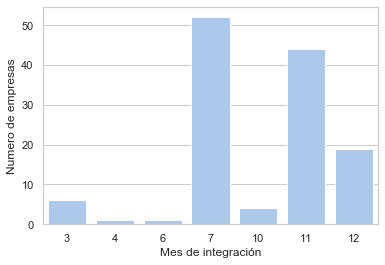

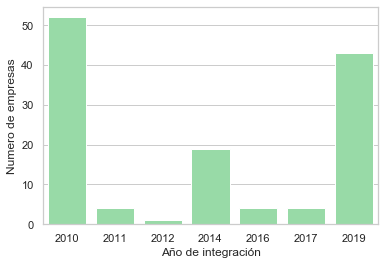

In [364]:
gm.iplot(x='index', y='Mes',kind='bar', xTitle='Mes',yTitle='N. Empresas', title='Mes de integración')
gk.iplot(x='index', y='Año',kind='bar', xTitle='Año',yTitle='N. Empresas', title='Año de integracion....')
ax = sns.barplot(x = 'index', y = 'Mes', data = gm, color = 'b')
ax.set(xlabel='Mes de integración', ylabel='Numero de empresas')
ax.figure.savefig('../images/Mes {}.png'.format(giro))
plt.show()
a2 = sns.barplot(x = 'index', y = 'Año', data = gk, color = 'g')
a2.set(xlabel='Año de integración', ylabel='Numero de empresas')
a2.figure.savefig('../images/Año {}.png'.format(giro))
plt.show()



In [365]:
mask=(gk["index"] > 2011) & (gk["index"] < 2019)
gk.loc[mask]


,index,Año
6,2012,1
2,2014,19
4,2016,4
3,2017,4


In [366]:
#Indice nacional de precios al consumidor

In [367]:
poblaT = pd.read_csv('../pobclave.csv')
poblaT.head()

,Unnamed: 0,AGEB,MZA,POBTOT,POBMAS,POBFEM,PEA,PEA_M,PEA_F,PE_INAC,PE_INAC_M,PE_INAC_F,clave
0,0,0000,0,8851080,4233783,4617297,4035075,2389679,1645396,3017165,920594,2096571,0000-0
1,1,0000,0,414711,196053,218658,187402,108940,78462,151520,48844,102676,0000-0
2,2,0000,0,414711,196053,218658,187402,108940,78462,151520,48844,102676,0000-0
3,3,0010,0,3424,1600,1824,1398,789,609,1511,552,959,0010-0
4,4,0010,1,202,96,106,75,47,28,97,37,60,0010-1


In [368]:

Evida = pd.read_csv('../Evida.csv')
Evida

,Unnamed: 0,Proba de sobrevivir,Unnamed: 3,Espe. Vida,Age
0,2,0.672031,0.327969,7.435258,0
1,3,0.491375,0.508625,7.790058,1
2,4,0.429555,0.570445,8.163900,2
3,5,0.385694,0.614306,8.557950,3
4,6,0.351672,0.648328,8.972207,4
5,7,0.323874,0.676126,9.396568,5


In [369]:
p=d.clave
len(p)
dx=poblaT[poblaT["clave"].isin(p)]
print(len(dx))

dx["POBMAS"]=dx.POBMAS.str.replace('*' , '0').astype(int)
dx["POBFEM"]=dx.POBFEM.str.replace('*' , '0').astype(int)
dx["PEA"]=dx.PEA.str.replace('*' , '0').astype(int)
dx["PEA_M"]=dx.PEA_M.str.replace('*' , '0').astype(int)
dx["PEA_F"]=dx.PEA_F.str.replace('*' , '0').astype(int)
print(dx.POBTOT.sum())
print(dx.POBMAS.sum())
print(dx.POBFEM.sum())
print(dx.PEA.sum())
print(dx.PEA_M.sum())
print(dx.PEA_F.sum())

65
8467
4159
4301
4886
2763
2116


In [370]:
from fpdf import FPDF
 
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Analisis de Supervivencia de Pymes en CDMX", ln=4, align="C")
pdf.cell(90, 10, " ", 0, 2, 'C')   
pdf.multi_cell(0,8,"La palabra de búsqueda es: --{}--, con longitud {} y latitud {}\nEsta búsqueda extrae toda la competencia tanto indirecta como directa en \
un rango de {} mts.\nEn total son {} empresas, con {} clases de actividades diferentes, de las cuales destacan ".format(giro,long,lat,mts,len(data),len(data.Clase_actividad.unique())) ,0,10)
pdf.cell(90, 3, " ", 0, 2, 'C')
if len(sss) >= 5:
    pdf.multi_cell(0,10,"1. {} : {} \n2. {} : {} \n3. {} : {} \n4. {} : {} \n5. {} : {}".format(sss.index[0],sss[0],sss.index[1],sss[1],sss.index[2],sss[2],sss.index[3],sss[3],sss.index[4],sss[4]) ,1,10)
else:
    pdf.multi_cell(0,10,"1. {} : {} \n2. {} : {}".format(sss.index[0],sss[0],sss.index[1],sss[1]) ,1,10)
    
pdf.cell(90, 5, " ", 0, 2, 'C')
pdf.set_font("Arial", size=10)
pdf.cell(200, 10, txt="Da click en botón rojo para ver mapa inteactivo", ln=4, align="C")
pdf.multi_cell(0,6,"TABLAS DE INCORPORACIóN A DENUE *INEGI*\n *Por el momento solo contamos con info de Denue, el cual no muestra la fecha de fundación de las empresas esta se utilizaria para ver la demanda del \
servicio/producto asi como hacer modelos que predigan la creación de nuevas empresas en el sector",0,3)
pdf.image('../images/Año {}.png'.format(giro), x=8, y=153, w=105, h=70)
pdf.image('../images/Mes {}.png'.format(giro), x=110, y=153, w=105, h=70)
pdf.image('../images/red.png'.format(giro), x=55, y=113, w=15, h=9, link = "../mapas/mapa {}.html".format(giro))
pdf.set_font("Arial", size=12)
pdf.cell(94, 85, " ", 0, 2, 'C')   
def simple_table2(spacing=1.5):
    data = [['Años', 'Prob. de Sobrevivir','Esperanza de Vida'],
            ['0', '0.672031','7.435258'],
            ['1', '0.491375','7.790058'],
            ['2', '0.429555','8.163900'],
            ['3', '0.385694','8.557950'],
            ['4', '0.351672','8.972207']
            ]
    col_width = pdf.w / 3.4
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table2()
pdf.cell(200, 15, txt="Población", ln=4)
def simple_table(spacing=2,align="C"):
    data = [['Población Total', '{}'.format(dx.POBTOT.sum())],
            ['Población Masculina', '{}'.format(dx.POBMAS.sum())],
            ['Población Femenina', '{}'.format(dx.POBFEM.sum())],
            ['Población Economicamente Activa', '{}'.format(dx.PEA.sum())],
            ['Población M. Economicamente Activa', '{}'.format(dx.PEA_M.sum())],
            ['Población M. Economicamente Activa', '{}'.format(dx.PEA_F.sum())]
            ]
    col_width = pdf.w / 2.2
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table()

pdf.output("simple_demo.pdf",'F')

''

In [ ]:
def simple_table(spacing=2):
    data = [['{}'.format(sss.index[0]), '{}'.format(sss[0])],
            ['{}'.format(sss.index[1]), '{}'.format(sss[1])],
            ['{}'.format(sss.index[2]), '{}'.format(sss[2])],
            ['{}'.format(sss.index[3]), '{}'.format(sss[3])],
            ['{}'.format(sss.index[4]), '{}'.format(sss[4])]
            ]
    col_width = pdf.w / 2.5
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
if __name__ == '__main__':
    simple_table()

SyntaxError: positional argument follows keyword argument (<ipython-input-327-3b49a25e5dcc>, line 1)

,clase,tipo,valor
0,clase 1,tipo 1,0
1,clase 1,tipo 1,1
2,clase 1,tipo 2,2
3,clase 1,tipo 2,3
4,clase 1,tipo 2,4
5,clase 2,tipo 3,5
6,clase 2,tipo 3,6
7,clase 2,tipo 4,7
8,clase 2,tipo 4,8
9,clase 2,tipo 4,9
